In [128]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    
    
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

In [129]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [130]:
from sklearn.metrics import confusion_matrix

def return_accuracy(predictor,X_train,y_train,X_test,y_test) :
    predictor.fit(X_train,y_train)
    res = predictor.predict(X_train)
    cm = confusion_matrix(y_train, res)
    train_accuracy =  (cm[0][0]+cm[1][1])/sum(sum(cm)) 
    res = predictor.predict(X_test)
    cm = confusion_matrix(y_test, res)
    test_accuracy = (cm[0][0]+cm[1][1])/sum(sum(cm))
    return [train_accuracy,test_accuracy]

In [131]:
import pandas as pd
import numpy as np

In [132]:
titanic=pd.read_csv("train.csv",sep=",")
test_init=pd.read_csv("test.csv")

## Correlation map titanic data

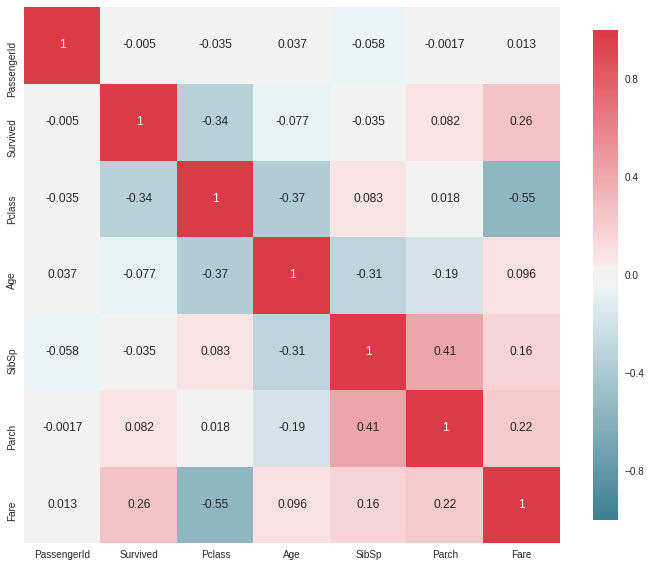

In [133]:
plot_correlation_map(titanic)

## Proportion people having survived by classes

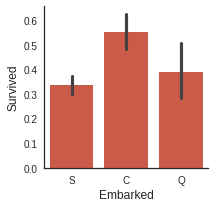

In [134]:
plot_categories(titanic,cat='Embarked',target='Survived')

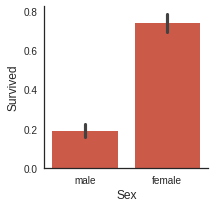

In [135]:
plot_categories(titanic,cat='Sex',target='Survived')

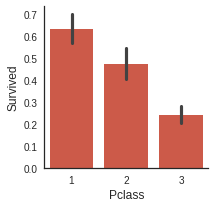

In [136]:
plot_categories(titanic,cat='Pclass',target='Survived')

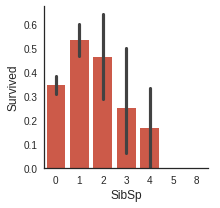

In [137]:
plot_categories(titanic,cat='SibSp',target='Survived')

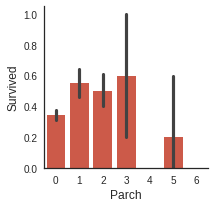

In [138]:
plot_categories(titanic,cat='Parch',target='Survived')

Sex is a very discriminant variable regarding the survival rate, so is the PCLASS, and the embarkement, the other variables are not so discrminant 

## Convert catergorical variables to numerical

In [139]:
sex = pd.Series( np.where( titanic.Sex == 'male' , 1 , 0 ) , name = 'Sex' )
embarked = pd.get_dummies( titanic.Embarked , prefix='Embarked' )
#pclass = pd.get_dummies( titanic.Pclass , prefix='Pclass' )

In [207]:
titanic["Cabin"][0].isnull()

AttributeError: 'float' object has no attribute 'isnull'

In [200]:
import math

In [213]:
titanic['Cabin']=titanic['Cabin'].fillna("U")

In [216]:
def cabin_classif(cabin) :
    cabin = cabin[0]
    return cabin

In [217]:
titanic['Cabin'] = titanic['Cabin'].map(lambda x: cabin_classif(x))

In [218]:
titanic['Title'] = titanic['Name'].map(lambda x: get_title(x))

In [219]:
def title_classif(title) :
    if title in ["Miss","Mlle","Mme","Mrs","Ms"] :
        title = "Mrs"
    elif title in ["Capt","Col","Master","Major"]:
        title = "Capt"
    elif title in ["the Countess", "Lady"] :
        title = "Noble"
    elif title in ["Don","Rev", "Dr", "Sir","Jonkheer"] :
        title = "Mr"
        
    return title

In [220]:
titanic['Title']=titanic['Title'].map(lambda x: title_classif(x))

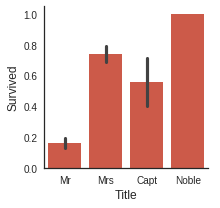

In [221]:
plot_categories(titanic,cat='Title',target='Survived')

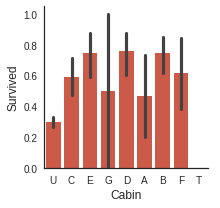

In [222]:
plot_categories(titanic,cat='Cabin',target='Survived')

In [145]:
title = pd.get_dummies( titanic.Title , prefix='' )

In [146]:
title.head()

,_Capt,_Mr,_Mrs,_Noble
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [147]:
titles = sorted(set([x for x in titanic.Name.map(lambda x: get_title(x))]))
print('Different titles found on the dataset:')
print(len(titles), ':', titles)

Different titles found on the dataset:
17 : ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess']


In [148]:
title

,_Capt,_Mr,_Mrs,_Noble
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,1,0,0,0
8,0,0,1,0
9,0,0,1,0


In [149]:
sex = pd.Series( np.where( titanic.Sex == 'male' , 1 , 0 ) , name = 'Sex' )

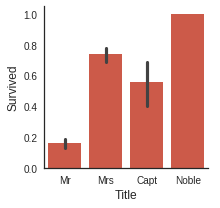

In [150]:
plot_categories(titanic,cat='Title',target='Survived')

In [151]:
titanic["Young"]="NaN"

In [152]:
titanic.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [153]:
def age_classif(age) :
    if age<= 8:
        age=1
    else :
        age=0
        
    return age

In [154]:
titanic['Young']=titanic.Age.map(lambda x: age_classif(x))

In [155]:
titanic["Young"].value_counts()

0    837
1     54
Name: Young, dtype: int64

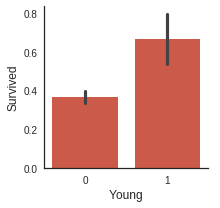

In [156]:
plot_categories(titanic,cat='Young',target='Survived')

In [157]:
titanic["Rich"]="NaN"

In [158]:
for i in range(len(titanic["Rich"])) :
    if titanic["Fare"][i]>= 300:
        titanic["Rich"][i]=4
    if titanic["Fare"][i]>= 75:
        titanic["Rich"][i]=3
        
    elif titanic["Fare"][i]>= 15:
        titanic["Rich"][i]=2
    elif titanic["Fare"][i]>= 1:
        titanic["Rich"][i]=1
    else :
        titanic["Rich"][i]=0

In [159]:
titanic["Rich"].value_counts()

1    442
2    337
3     97
0     15
Name: Rich, dtype: int64

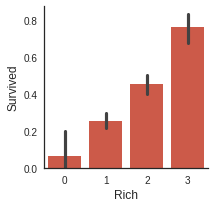

In [160]:
plot_categories(titanic,cat='Rich',target='Survived')

In [161]:
train=pd.concat([titanic[["Rich","Young","SibSp"]],sex[ :891 ],title,embarked],axis=1)

In [162]:
len(train)

891

In [163]:
train.head()

,Rich,Young,SibSp,Sex,_Capt,_Mr,_Mrs,_Noble,Embarked_C,Embarked_Q,Embarked_S
0,1,0,1,1,0,1,0,0,0,0,1
1,2,0,1,0,0,0,1,0,1,0,0
2,1,0,0,0,0,0,1,0,0,0,1
3,2,0,1,0,0,0,1,0,0,0,1
4,1,0,0,1,0,1,0,0,0,0,1


In [164]:
#variables=["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

In [165]:
variables=train.columns

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(train[variables], titanic.Survived, test_size=0.4, random_state=0)

In [168]:
len(X_train)

534

In [169]:
len(X_test)

357

In [170]:
X_train.head()

,Rich,Young,SibSp,Sex,_Capt,_Mr,_Mrs,_Noble,Embarked_C,Embarked_Q,Embarked_S
100,1,0,0,0,0,0,1,0,0,0,1
722,1,0,0,1,0,1,0,0,0,0,1
678,2,0,1,0,0,0,1,0,0,0,1
229,2,0,3,0,0,0,1,0,0,0,1
334,3,0,1,0,0,0,1,0,0,0,1


In [171]:
from sklearn.preprocessing import Imputer
from sklearn import preprocessing

In [172]:
X_train.columns

Index(['Rich', 'Young', 'SibSp', 'Sex', '_Capt', '_Mr', '_Mrs', '_Noble',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [173]:
X_train.head()

,Rich,Young,SibSp,Sex,_Capt,_Mr,_Mrs,_Noble,Embarked_C,Embarked_Q,Embarked_S
100,1,0,0,0,0,0,1,0,0,0,1
722,1,0,0,1,0,1,0,0,0,0,1
678,2,0,1,0,0,0,1,0,0,0,1
229,2,0,3,0,0,0,1,0,0,0,1
334,3,0,1,0,0,0,1,0,0,0,1


In [174]:
X_train=X_train.apply(lambda x: x.fillna(x.mean()),axis=0)

In [175]:
X_test=X_test.apply(lambda x: x.fillna(x.mean()),axis=0)

In [176]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier

In [177]:
n_individuals = [ 10, 50, 100, 150, 200, 250, 300, 350]

In [178]:
df_res = pd.DataFrame()

In [179]:
for individual in n_individuals :
    clf = RandomForestClassifier(n_estimators = 5000)
    res = return_accuracy(clf,X_train[:individual],y_train[:individual],X_test[:individual],y_test[:individual])
    df_res = df_res.append({'train':res[0], 'test':res[1]}, ignore_index=True)

In [180]:
df_res

,test,train
0,0.700000,0.900000
1,0.820000,0.900000
2,0.770000,0.890000
3,0.773333,0.873333
4,0.790000,0.845000
5,0.812000,0.844000
6,0.780000,0.846667
7,0.802857,0.848571


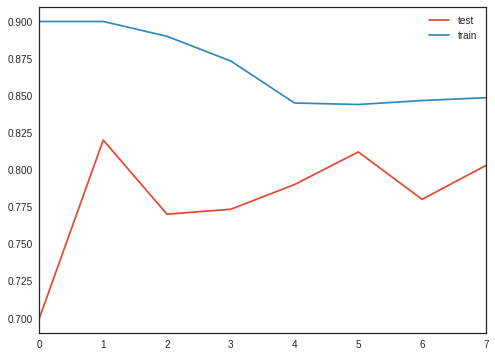

In [181]:
df_res.plot()

In [70]:
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores.mean()

0.81461235525774411

In [71]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [72]:
res=clf.predict(X_train)

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
cm = confusion_matrix(y_train, res)
print(cm)

[[291  37]
 [ 47 159]]


In [75]:
(cm[0][0]+cm[1][1])/sum(sum(cm)) 

0.84269662921348309

In [76]:
res=clf.predict(X_test)

In [77]:
cm = confusion_matrix(y_test, res)
print(cm)

[[190  31]
 [ 38  98]]


In [78]:
(cm[0][0]+cm[1][1])/sum(sum(cm)) 

0.80672268907563027

## Prediction

In [106]:
test=test_init

In [107]:
len(test)

418

In [108]:
sex = pd.Series( np.where( test.Sex == 'male' , 1 , 0 ) , name = 'Sex' )
embarked = pd.get_dummies( test.Embarked , prefix='Embarked' )
pclass = pd.get_dummies( test.Pclass , prefix='Pclass' )

In [109]:
test["Young"]="NaN"
test['Young']=test.Age.map(lambda x: age_classif(x))    
test["Rich"]="NaN"

In [110]:
for i in range(len(test["Rich"])) :
    if test["Fare"][i]>= 300:
        test["Rich"][i]=4
    if test["Fare"][i]>= 75:
        test["Rich"][i]=3
        
    elif test["Fare"][i]>= 15:
        test["Rich"][i]=2
    elif test["Fare"][i]>= 1:
        test["Rich"][i]=1
    else :
        test["Rich"][i]=0

In [111]:
test['Title'] = test['Name'].map(lambda x: get_title(x))

In [112]:
test['Title']=test['Title'].map(lambda x: title_classif(x))

In [113]:
test.Title.head()

0     Mr
1    Mrs
2     Mr
3     Mr
4    Mrs
Name: Title, dtype: object

In [114]:
title = pd.get_dummies( test.Title , prefix='' )

In [115]:
len(title.columns)

4

In [116]:
test=pd.concat([test[["Rich","Young","SibSp"]],sex,title,embarked],axis=1)

In [117]:
enc = preprocessing.OneHotEncoder(n_values=[2,3,3,3])
enc.fit(test[['Sex','Embarked_C', 'Embarked_Q', 'Embarked_S']])

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values=[2, 3, 3, 3], sparse=True)

In [118]:
test.head()

,Rich,Young,SibSp,Sex,_Capt,_Dona,_Mr,_Mrs,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,1,0,0,1,0,0,1,0
1,1,0,1,0,0,0,0,1,0,0,1
2,1,0,0,1,0,0,1,0,0,1,0
3,1,0,0,1,0,0,1,0,0,0,1
4,1,0,1,0,0,0,0,1,0,0,1


In [119]:
test=test.apply(lambda x: x.fillna(x.mean()),axis=0)

In [120]:
test.head()

,Rich,Young,SibSp,Sex,_Capt,_Dona,_Mr,_Mrs,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,1,0,0,1,0,0,1,0
1,1,0,1,0,0,0,0,1,0,0,1
2,1,0,0,1,0,0,1,0,0,1,0
3,1,0,0,1,0,0,1,0,0,0,1
4,1,0,1,0,0,0,0,1,0,0,1


In [121]:
len(test)

418

In [122]:
res=clf.predict(test)

In [123]:
len(res)

418

In [124]:
data={'PassengerId':test_init.PassengerId,'Survived':res}

In [125]:
res=pd.DataFrame.from_dict(data)

In [126]:
res.to_csv("res.csv",index=False)

In [127]:
len(res)

418